In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df.drop(0, inplace = True)
df.reset_index(inplace = True)
df.drop(columns = 'index', inplace = True)

df['job_skills'] = df['job_skills'].apply(lambda skillset: ast.literal_eval(skillset) if pd.notna(skillset) else skillset)

In [8]:
df = df[df['job_title_short'] == 'Data Analyst']

In [9]:
df_exploded = df.explode('job_skills')

In [10]:
df_exploded_grp = df_exploded.groupby('job_skills').agg({'salary_year_avg':'median', 'job_skills':'size'})
df_exploded_grp

,salary_year_avg,job_skills
job_skills,,
airflow,111175.0,2002
airtable,90000.0,88
alteryx,105000.0,4570
angular,109101.0,376
angular.js,NaN,2
...,...,...
wrike,75000.0,39
wsl,NaN,16
xamarin,NaN,2


In [17]:
skill_stats = df_exploded.groupby('job_skills').agg(
    skill_count = ('job_skills', 'count'),
    median_salary = ('salary_year_avg', 'median')
    )

skill_stats= skill_stats.sort_values(by='skill_count', ascending= False).head(10)
skill_stats

,skill_count,median_salary
job_skills,,
sql,92428,92500.0
excel,66860,84479.0
python,57190,98500.0
tableau,46455,95000.0
power bi,39380,90000.0
r,29996,92527.5
sas,27998,90000.0
powerpoint,13822,85000.0
word,13562,80000.0


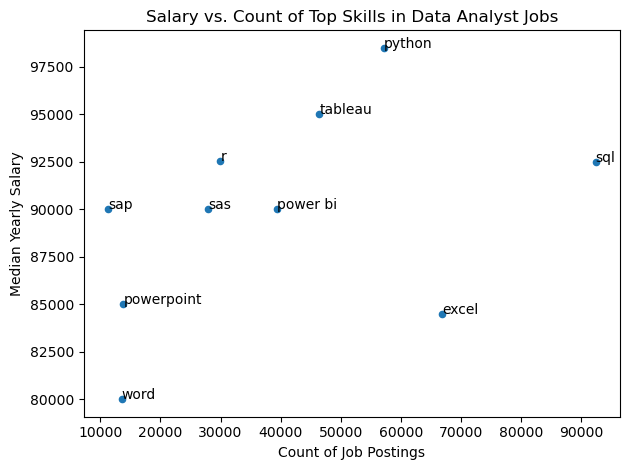

In [26]:
skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')

# plt.text() function to label the points
for i, txt in enumerate(skill_stats.index):
    plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt)

plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary')
plt.title('Salary vs. Count of Top Skills in Data Analyst Jobs')
plt.tight_layout()
plt.show()